In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('fraud_risk_dataset.csv', header=0, index_col=0)
df.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
df.shape

(19030, 2329)

In [4]:
# code from https://github.com/sshreyas999/Credit-Card-Clustering-PCA-Kmeans/blob/main/Credit%20Card%20Clustering%20(PCA%20%2B%20Kmeans).ipynb
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder
from sklearn.decomposition import PCA  

In [5]:
ccfullData = pd.read_csv('credit_date_df.csv', header=0, index_col=0)
ccfullData.head()

,year,month,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019,8,500,0,0,2,1,1,33521,50283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,8,500,0,0,0,98,98,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,2019,8,500,0,0,1,0,0,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,8,500,0,0,0,98,98,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,2019,8,500,0,1,2,0,0,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [6]:
#one-hot encoding
ccfullData = pd.get_dummies(ccfullData, columns = ['year', 'month','product_term_credit_limit'])

In [7]:
#fill the null values
scaled_ccfullData = ccfullData.fillna(0)
scaled_ccfullData.drop('NP', axis=1, inplace=True)

In [8]:
scaler = StandardScaler()
scaled_ccfullData = scaler.fit_transform(scaled_ccfullData) 
norm_ccfullData = normalize(scaled_ccfullData)

In [9]:
y = ccfullData['NP']

In [10]:
pca = PCA().fit(norm_ccfullData)

In [11]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)
var1

array([16.34, 25.1 , 32.51, ..., 99.65, 99.65, 99.65])

Text(0, 0.5, 'Cumulative Proportion variance explained')

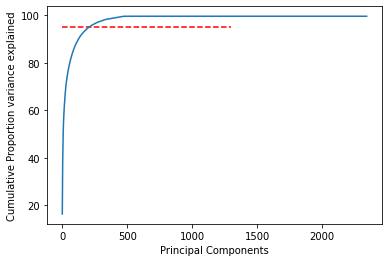

In [12]:
# plot 
plt.plot(var1)
plt.hlines(95,0,1300,colors='red',linestyles='dashed')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Proportion variance explained")

In [13]:
# to find principal component which is taken greather than 95 %
Num_components = var1<=95
print("Number of principal Components")
n_com = Num_components.sum()
n_com

Number of principal Components


205

In [14]:
#Getting only the components which explains 95% variance
pca = PCA(n_components = 0.95)
pca.fit(norm_ccfullData)
reduced = pca.transform(norm_ccfullData)

In [15]:
df_X = pd.DataFrame(reduced)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,-0.377052,-0.224054,0.134491,-0.173072,0.126993,0.274012,0.248244,0.120140,-0.015254,0.145852,...,0.009069,-0.006915,-0.012541,0.001697,-0.033892,-0.026807,0.007660,0.019300,-0.025354,-0.013115
1,-0.215939,0.097861,-0.441370,-0.062415,0.102586,0.095256,-0.151925,-0.139770,-0.017695,-0.108473,...,0.001216,-0.025200,0.025830,-0.019292,0.006174,0.005965,-0.024213,0.020205,0.006151,0.011441
2,-0.433044,-0.292189,0.103303,-0.197556,-0.148346,0.115986,0.141328,-0.055017,0.031563,-0.059281,...,-0.015220,0.009067,-0.016267,0.005449,0.008960,-0.010145,0.012318,0.002319,-0.029515,0.013680
3,0.645904,-0.163733,0.073873,0.160849,-0.054638,-0.171076,-0.163456,0.008809,0.321037,-0.027071,...,-0.033532,0.010665,0.070341,0.010359,0.002414,0.001668,0.007842,0.007972,-0.014320,-0.020992
4,0.019909,0.561710,-0.053557,0.093507,-0.083072,0.057074,-0.119278,0.128485,0.292269,0.070405,...,-0.031965,0.017297,-0.004596,-0.010851,-0.024625,0.005640,-0.007817,0.031339,0.008915,-0.021146


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_X, df['NP'], test_size=0.1, random_state=42)

In [17]:
train = pd.concat([X_train, y_train], axis=1)
valid = pd.concat([X_valid, y_valid], axis=1)

In [18]:
train.to_csv('credit-risk-pca-train.csv', sep=',')
valid.to_csv('credit-risk-pca-valid.csv', sep=',')